# Task 3 - Qiskit Aer Simulator

Tasks 1 and 2 only involve visualizing the states and the circuits using Qiskit.
To view the results of measurements, we need a simulator to run those circuits. Qiskit Aer is a powerful simulator for that matter.

In [19]:
# Add imports here, no code other than imports in this cell
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

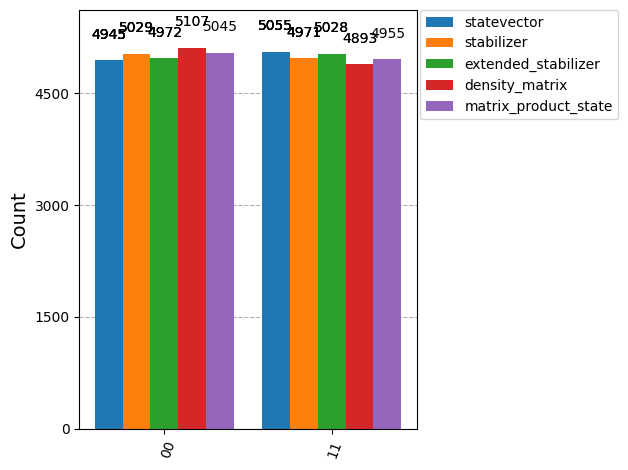

In [15]:
# Task 3.1 - Create a Bell pair circuit. Add measurements to all qubits.
# Take shots=10,000 and use all methods ('statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state') to run the circuit and get the counts.
# Plot the counts in one histogram.
# Note: Some methods may take longer time to run.

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

#sv_sim = AerSimulator(method="statevector")
#sv_compiled = transpile(qc,sv_sim)
#sv_res = sv_sim.run(sv_compiled,shots = 10000)

methods = ['statevector','stabilizer','extended_stabilizer','density_matrix','matrix_product_state'] 
results = []
for m in methods:
    sim = AerSimulator(method=m)
    compiled = transpile(qc,sim)
    res = sim.run(compiled,shots = 10000)
    results.append(res.result().get_counts(compiled))

#plot_histogram(sv_res.result().get_counts(sv_compiled))
plot_histogram(results,legend = methods)

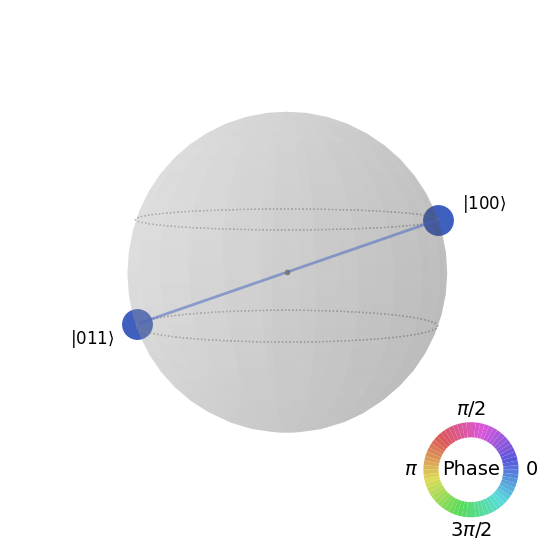

In [22]:
# Task 3.2 - Create a Cat state 1/sqrt(2)(|001> - |110>). Visualize the state using a qsphere.

qc = QuantumCircuit(3,3)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.x(2)

state = Statevector.from_int(0,8)
state = state.evolve(qc)
plot_state_qsphere(state)

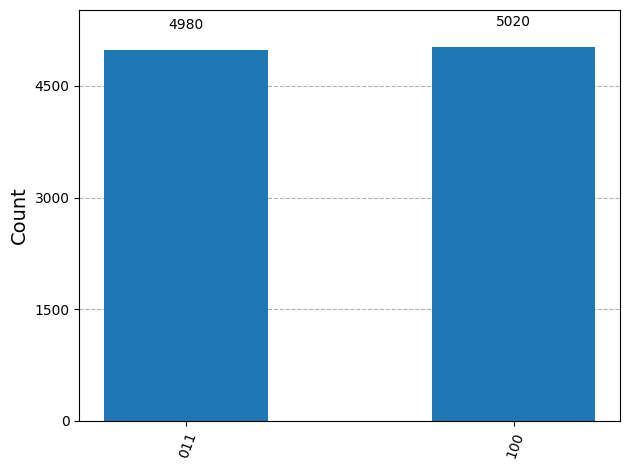

In [24]:
# Task 3.3 - Plot the histogram of the results of Task 3.2 after adding measurements to all qubits and running the circuit with shots=10,000 using density_matrix method.

qc.measure([0,1,2],[0,1,2])

sim = AerSimulator(method='density_matrix')
compiled = transpile(qc,sim)
res = sim.run(compiled,shots = 10000)
count = res.result().get_counts(compiled)
plot_histogram(count)
